## sklearn.feature_selection
### 정의 : 머신러닝 모델의 성능을 향상시키기 위해 데이터의 특징(feature)을 선택하거나 제거하는 다양한 방법을 제공한다. 특징 선택은 데이터 전처리 과정에서 중요한 단계로, 불필요하거나 중복된 특징을 제거함으로써 모델의 과적합(overfitting)을 방지하고 학습 속도를 향상시킬 수 있다.
    ** 주요 클래스 및 함수 **
    - SelectKBest : 필터 방법 중 단일 변수 통계 테스트를 사용하여 특징을 선택.
    - VarianceThreshold : 분산을 기준으로 특징을 제거하는 간단한 필터 방법.

## VarianceThreshold

### 정의 : scikit-learn에서 제공하는 필터 방법 중 하나로, 데이터셋에서 분산이 일정 수준 이하인 특징을 제거하는 간단한 특징 선택 방법이다. "분산이 낮다는 것은 해당 특징이 거의 변화하지 않으며, 모델 학습에 큰 기여를 하지 않을 가능성이 높음의 의미한다."

### 사용 이유
- 노이즈 제거 : 변화가 거의 없는 특징은 모델에 노이즈를 추가할 수 있다.
- 차원 축소 : 불필요한 특징을 제거하여 데이터의 차원을 줄인다.
- 계산 효율성 향상 : 특징 수가 줄어들면 학습 및 예측 속도가 빨라진다.

### 주요 파라미터
- threshold : 제거할 분산의 기준값을 설정한다. 기본값은 0으로, 분산이 0인 특징만 제거한다.

## SelectKBest

### 정의 : scikit-learn의 필터 방법 중 하나로, 단일 변수 통계 테스트를 사용하여 상위 k개의 특징을 선택한다. "각 특징이 타깃 변수와 얼마나 관련성 있는지를 평가하여, 가장 관련성이 높은 특징들을 선택한다."

### 사용 이유
- 관련성이 높은 특징 선택 : 타깃 변수와 가장 관련이 높은 특징을 선택하여 모델의 예측 성능을 향상시킨다.
- 차원 축소 : 특징 수를 줄여 모델의 복잡성을 낮추고, 학습 속도를 개선한다.
- 해석 용이성 : 중요한 특징만을 남기면 모델의 해석이 쉬워진다.

### 주요 파라미터
- socre_func : 특징의 점수를 계산하는 함수. 예를들어, 분류 문제에서 f_classif(ANOVA F-검정), 회귀 문제에서는 f_regression 등을 사용한다.
- k : 선택할 특징의 수를 지정한다.기본 값은 10개이다.

### 분산에 대한 수학적 정의
- 분산은 데이터 값들이 평균에서 얼마나 떨어져 있는지를 나타내는 지표입니다.
- 분산이 작다는 것은 : 
    - 값들이 평균값과 거의 차이가 없음을 의미한다.
    - 즉, 피처의 값들이 거의 변하지 않고 비슷한 값이 반복된다.
    - 이러한 피처는 데이터에 중요한 정보를 제공하지 못할 가능성이 크다.
    - 예측에 도움이 되지 않으며, 모델 성능에 부정적인 영향을 미칠 수 있다.
        - 모든 값이 비슷하면, 모델이 학습할 유용한 패턴이 없으므로 예측하기 어렵다.
        - 불필요한 피처는 과적합을 유발할 수 있다.
- 분산이 크다는 것은 : 
    - 값들이 평균값에서 많이 떨어져 있어 피처가 더 다양하다는 의미이다.
    - 하지만, 분산이 높다고 해서 반드시 좋은 피처인 것은 아니다.
    - 피처의 중요도를 평가할 때 분산은 고려할 우선순위가 될 수 있지만 도메인 지식과 함께 평가하는 것이 중요하다.
    
### 임계값(Threshold)
- 기본적으로 분산이 0인 피처는 제거하는 것이 일반적이다.
- 분산의 임계값은 0.1 ~ 0.5 사이가 적절할 수 있지만, 이는 데이터의 도메인에 따라 달라질 수 있다.
    - 비율 기준으로 임계값을 설정하거나,
    - 각 피처의 분산을 직접 계산하여 탐색한 후 실험적으로 제거하거나 추가하여 모델 성능을 테스트 할 수 있다.

In [1]:
#분산에 대한 예시코드
from sklearn.feature_selection import VarianceThreshold

X = [[0,2,0,3],
    [0,1,2,3],
    [0,1,1,5]]

#분산의 임계값을 0.2로 설정
selector = VarianceThreshold(threshold=0.2)
X_high_variance = selector.fit_transform(X)

In [2]:
X_high_variance

array([[2, 0, 3],
       [1, 2, 3],
       [1, 1, 5]])

In [3]:
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

In [4]:
X = np.array([[1,2,3],
             [4,5,6],
             [7,8,9],
             [10,11,12]])
y = np.array([0,1,0,1]) #타겟값 범주형(생존률)

In [5]:
#상위 2개 피처 선택한다.
#SelectKBest의 매개변수

#사용할 통계적 테스트 함수로, 어떤 방법으로 각 특성의 점수를 계산할지 결정합니다.
# ----> chi2을 사용한다.
#k : 선택할 특성의 개수를 지정
selector = SelectKBest(chi2, k = 2)

In [6]:
X_new_sel = selector.fit_transform(X,y)

In [7]:
X_new_sel

array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])

## 타이타닉 데이터로 feature_selection

In [8]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [9]:
tt = sns.load_dataset('titanic')

In [10]:
#결측치 처리
tt['age'].fillna(tt['age'].median(), inplace = True)
tt['embark_town'].fillna(tt['embark_town'].mode()[0], inplace = True)
tt['fare'].fillna(tt['fare'].median(), inplace = True)

/var/folders/gy/ylcsy3wj18b_80z186rb1dcw0000gn/T/ipykernel_27398/1647315501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tt['age'].fillna(tt['age'].median(), inplace = True)
/var/folders/gy/ylcsy3wj18b_80z186rb1dcw0000gn/T/ipykernel_27398/1647315501.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [11]:
#사용할 피처 정리
X = tt[['pclass', 'sex', 'age', 'fare', 'embark_town']]
y = tt['survived']

#### qcut란 무엇인가?
#### 정의 : 연속형(숫자형) 데이터를 등분위수(quantiles) 기반으로 범주형(bin) 데이터로 변환하는 데 사용된다. 이를 통해 데이터의 분포에 따라 균등하게 나누어진 구간으로 데이터를 분류할 수 있다.

#### 주요개념
- 등분위수(Quantiles) : 데이터를 동일한 크기의 그룹으로 나누는 지표이다. 예를들어 4개의 그룹으로 나누는 경우 각 그룹은 전체 데이터의 25%씩을 포함한다.(1사분위수, 2사분위수, 3사분위수).
- 빈(Bin) : 테이터를 특정 구간으로 나눈 범주를 의미한다. 예를들어, 연령대를 0-20, 21-40, 41-60, 61-80으로 나누는 것과 같다.

#### qcut의 특징
- 1. 동일한 데이터 포인트의 수 : qcut는 지정한 개수의 빈에 데이터를 나눌 때, 각 빈에 동일한 수의 데이터 포인트가 포함되도록 한다. 이는 데이터가 고르게 분포되지 않은 경우에도 각 빈에 균등한 데이터가 포함되도록 보장한다.
- 2. 자동 경계 계산 : qcut는 데이터의 분포를 기반으로 자동으로 구간 경계를 계산한다. 따라서 데이터의 분포에 따라 빈의 크기가 달라질 수 있다.
- 3. 중복 값 처리 : 동일한 값이 빈 경계에 걸릴 경우, qcut는 해당 값들을 동일한 빈에 포함시킨다. 이로 인해 일부 빈의 데이터 수가 동일하지 않을 수 있다.

In [12]:
#연속형 변수를 범주형
#qcut 분위수로
X.loc[:, 'age_binned'] = pd.qcut(X['age'], q=4, labels = False)
X.loc[:, 'fare_binned'] = pd.qcut(X['fare'], q=4, labels = False)

/var/folders/gy/ylcsy3wj18b_80z186rb1dcw0000gn/T/ipykernel_27398/2348784324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'age_binned'] = pd.qcut(X['age'], q=4, labels = False)
/var/folders/gy/ylcsy3wj18b_80z186rb1dcw0000gn/T/ipykernel_27398/2348784324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'fare_binned'] = pd.qcut(X['fare'], q=4, labels = False)


In [13]:
#One-Hot-Encoder를 잡아서 진행
X = X.drop(['age', 'fare'], axis = 1)
#One-Hot-Encoder : 범주형 데이터 인코딩 도구, 범주형 피처를 원핫 인코딩 방식으로 변환하여,
#머신러닝 모델이 이를 수치 데이터로 이해할 수 있도록 한다.
#파라미터 설정.
#sparse_output = False -> 밀집 배열 형태로 결과를 반환.
#drop='first' -> 각 범주형 피처의 첫 번째 카테고리를 제거한다.
onehot_encoder = OneHotEncoder(sparse_output = False, drop='first')

In [14]:
X_encoded = onehot_encoder.fit_transform(X)

In [15]:
X_encoded

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [16]:
##카이제곱 검정 수행
chi_selector = SelectKBest(chi2, k='all')

In [17]:
#feature_selection으로 학습
X_selected_all = chi_selector.fit_transform(X_encoded, y)

In [18]:
chi_scores = pd.DataFrame({
    'Feature' : onehot_encoder.get_feature_names_out(X.columns),
    'Score' : chi_selector.scores_
}).sort_values(by='Score', ascending=True)

In [19]:
chi_scores

,Feature,Score
7,age_binned_3,0.001672
3,embark_town_Queenstown,0.010847
6,age_binned_2,1.615444
5,age_binned_1,3.612659
9,fare_binned_2,4.747353
4,embark_town_Southampton,5.489205
8,fare_binned_1,6.102089
0,pclass_2,6.160767
10,fare_binned_3,36.518405
1,pclass_3,41.553071


In [20]:
chi_selector = SelectKBest(chi2, k = 2)
X_selected = chi_selector.fit_transform(X_encoded, y)

In [25]:
#선택된 피처들 점수 산출
selected_indices = chi_selector.get_support(indices=True)
selected_features = onehot_encoder.get_feature_names_out(X.columns)[selected_indices]
selected_scores = chi_selector.scores_[selected_indices]
print(selected_indices)
print(selected_features)
print(selected_scores)

[1 2]
['pclass_3' 'sex_male']
[41.55307089 92.70244698]


<BarContainer object of 11 artists>

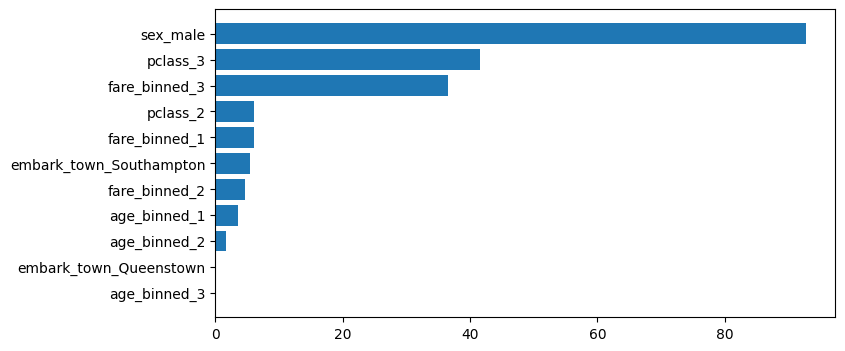

In [22]:
#간단한 시각화
plt.figure(figsize=(8,4))
plt.barh(chi_scores['Feature'], chi_scores['Score'])

<BarContainer object of 2 artists>

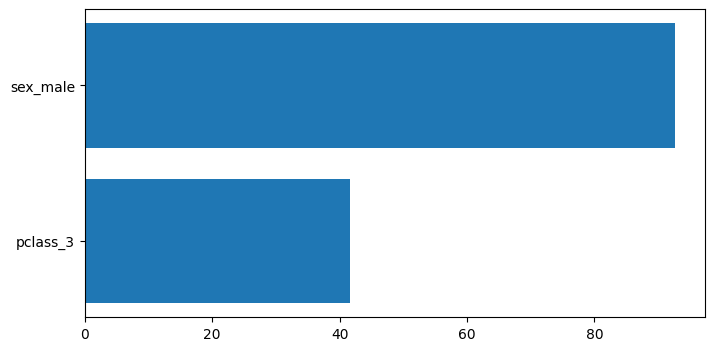

In [23]:
#간단한 시각화
plt.figure(figsize=(8,4))
plt.barh(selected_features, selected_scores)